In [30]:
# Make a prediction
from math import exp
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))


In [6]:

# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
coef = [-0.406605464, 0.852573316, -1.104746259]
for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f [%d]" % (row[-1], yhat, round(yhat)))

Expected=0.000, Predicted=0.299 [0]
Expected=0.000, Predicted=0.146 [0]
Expected=0.000, Predicted=0.085 [0]
Expected=0.000, Predicted=0.220 [0]
Expected=0.000, Predicted=0.247 [0]
Expected=1.000, Predicted=0.955 [1]
Expected=1.000, Predicted=0.862 [1]
Expected=1.000, Predicted=0.972 [1]
Expected=1.000, Predicted=0.999 [1]
Expected=1.000, Predicted=0.905 [1]


In [36]:
df = pd.DataFrame(dataset) 
def graphLine(slope, intercept):
    plt.scatter(df.iloc[5:,1], df.iloc[5:,2], c="blue")
    plt.scatter(df.iloc[:5,1], df.iloc[:5,2], c="red")
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


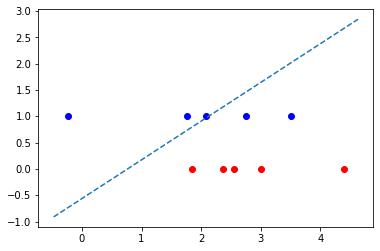

In [37]:
graphLine([-0.406605464, 0.852573316], -1.104746259)

In [4]:
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = row[-1] - yhat
			sum_error += error**2
			coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef

In [5]:
l_rate = 0.3
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.300, error=2.217
>epoch=1, lrate=0.300, error=1.613
>epoch=2, lrate=0.300, error=1.113
>epoch=3, lrate=0.300, error=0.827
>epoch=4, lrate=0.300, error=0.623
>epoch=5, lrate=0.300, error=0.494
>epoch=6, lrate=0.300, error=0.412
>epoch=7, lrate=0.300, error=0.354
>epoch=8, lrate=0.300, error=0.310
>epoch=9, lrate=0.300, error=0.276
>epoch=10, lrate=0.300, error=0.248
>epoch=11, lrate=0.300, error=0.224
>epoch=12, lrate=0.300, error=0.205
>epoch=13, lrate=0.300, error=0.189
>epoch=14, lrate=0.300, error=0.174
>epoch=15, lrate=0.300, error=0.162
>epoch=16, lrate=0.300, error=0.151
>epoch=17, lrate=0.300, error=0.142
>epoch=18, lrate=0.300, error=0.134
>epoch=19, lrate=0.300, error=0.126
>epoch=20, lrate=0.300, error=0.119
>epoch=21, lrate=0.300, error=0.113
>epoch=22, lrate=0.300, error=0.108
>epoch=23, lrate=0.300, error=0.103
>epoch=24, lrate=0.300, error=0.098
>epoch=25, lrate=0.300, error=0.094
>epoch=26, lrate=0.300, error=0.090
>epoch=27, lrate=0.300, error=0.087
>e

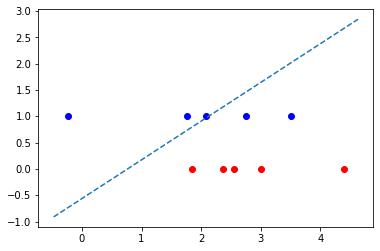

In [35]:
abline([coef[0],coef[1]] ,coef[2])